# Basic Usage


In [2]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), ".."))
from src.autora.theorist.g_1 import CustomMCMC
# autora state
from autora.state import StandardState, on_state, Delta

# experiment_runner
from autora.experiment_runner.synthetic.psychophysics.weber_fechner_law import weber_fechner_law
from autora.experiment_runner.synthetic.psychophysics.stevens_power_law import stevens_power_law
from autora.experiment_runner.synthetic.economics.expected_value_theory import expected_value_theory

# experimentalist
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_pool, random_sample

# data handling
from sklearn.model_selection import train_test_split


# to call the fit function
args
conditions_train, observations_train


This will try to model and equation that uses the training conditions and gets the training observation.

In [3]:
experiment_runner = stevens_power_law()

conditions = experiment_runner.domain()
experiment_data = experiment_runner.run(conditions, added_noise=0.01)

# get the name of the independent and independent variables
ivs = [iv.name for iv in experiment_runner.variables.independent_variables]
dvs = [dv.name for dv in experiment_runner.variables.dependent_variables]
# extract the dependent variable (observations) from experiment data
conditions = experiment_data[ivs]
observations = experiment_data[dvs]

conditions_train, conditions_test, observations_train, observations_test = train_test_split(conditions, observations)

theorist=CustomMCMC()

## equation:  ['ln', '+', '1.7772914593106224', 'S']
##--------------------- iteration:  0
## len_eqn:  4
## eqn_old:  ['ln', '+', '1.7772914593106224', 'S']
## method:  node_replacement
## equation:  ['ln', '+', '1.7772914593106224', 'S']
## fit_old:  -1.3543411262997636
## fit_new:  -1.3543411262997636
## acceptance_prob:  0.5
##--------------------- iteration:  1
## len_eqn:  4
## eqn_old:  ['ln', '+', '1.7772914593106224', 'S']
## method:  root_removal
## equation:  ['+', '1.7772914593106224', 'S']
## fit_old:  -1.3543411262997636
## fit_new:  -7.654857080378937
## acceptance_prob:  3.368526071804497e-06
##--------------------- iteration:  2
## len_eqn:  4
## eqn_old:  ['ln', '+', '1.7772914593106224', 'S']
## method:  root_addition
## equation:  ['+', 'ln', '+', '1.7772914593106224', 'S', 'S']
## fit_old:  -1.3543411262997636
## fit_new:  -7.060666413221561
## acceptance_prob:  1.1054625409050704e-05
##--------------------- iteration:  3
## len_eqn:  4
## eqn_old:  ['ln', '+', '1.

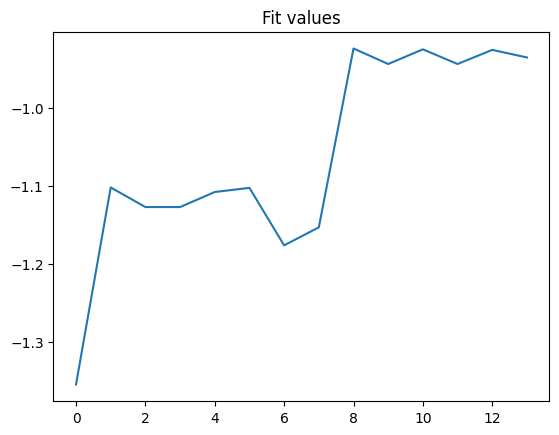

CustomMCMC()

In [5]:
theorist.fit(conditions_train, observations_train)

# to call the predict function
args
conditions_test

This will use the equation that we made using the fit fuction to predict results based on the test observations. 
We can compare the predictions to actual observation, to estimate the correctness of the model.

In [6]:
theorist.predict(conditions_test)

array([[2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468],
       [2.01960468]])

# to get the equation from the function
args:

This will print the equation estimated by the fit funciton.

In [7]:
theorist.print_eqn()

'(1.943761100704131 pow 1.0575918670978106)'

# -  4 points: Demonstrating that the theorist can recover at least two ground truth models.

In [8]:
def benchmark(experiment_runner, theorist):

  # generate all conditions
  conditions = experiment_runner.domain()

  # generate all corresponding observations
  experiment_data = experiment_runner.run(conditions, added_noise=0.01)

  # get the name of the independent and independent variables
  ivs = [iv.name for iv in experiment_runner.variables.independent_variables]
  dvs = [dv.name for dv in experiment_runner.variables.dependent_variables]

  # extract the dependent variable (observations) from experiment data
  conditions = experiment_data[ivs]
  observations = experiment_data[dvs]

  # split into train and test datasets
  conditions_train, conditions_test, observations_train, observations_test = train_test_split(conditions, observations)

  print("#### EXPERIMENT CONDITIONS (X):")
  print(conditions)
  print("#### EXPERIMENT OBSERVATIONS (Y):")
  print(observations)

  # fit theorist
  theorist.fit(conditions_train, observations_train)

  # compute prediction for validation set
  predictions = theorist.predict(conditions_test)

  print("#### PREDICTIONS:")
  print(predictions)
  # evaluate theorist performance
  error = (predictions - observations_test).pow(2)
  error = error.mean()

  print("#### IDENTIFIED EQUATION:")
  print(theorist.print_eqn())

  print("#### VALIDATION SET MSE:")
  print(error)

  experiment_runner.plotter(model=theorist)

#### EXPERIMENT CONDITIONS (X):
           S
0   0.010000
1   0.060404
2   0.110808
3   0.161212
4   0.211616
..       ...
95  4.798384
96  4.848788
97  4.899192
98  4.949596
99  5.000000

[100 rows x 1 columns]
#### EXPERIMENT OBSERVATIONS (Y):
    perceived_intensity
0              0.032582
1              0.114438
2              0.167995
3              0.249706
4              0.294260
..                  ...
95             3.510345
96             3.542799
97             3.561681
98             3.582547
99             3.609325

[100 rows x 1 columns]
## equation:  ['*', '1.9039460475312886', 'S']
##--------------------- iteration:  0
## len_eqn:  3
## eqn_old:  ['*', '1.9039460475312886', 'S']
## method:  node_replacement
## equation:  ['/', '1.9039460475312886', 'S']
## fit_old:  -16.581694631703783
## fit_new:  -19.612187729484145
## acceptance_prob:  0.00232667381092414
##--------------------- iteration:  1
## len_eqn:  3
## eqn_old:  ['*', '1.9039460475312886', 'S']
## method:  ro

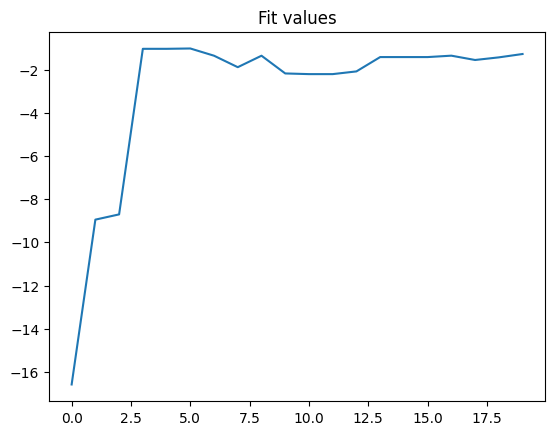

#### PREDICTIONS:
[[1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]
 [1.52439633]]
#### IDENTIFIED EQUATION:
((1.3993060245522058 pow 0.9770869065357958) pow 1.284272101464194)
#### VALIDATION SET MSE:
perceived_intensity    1.173552
dtype: float64


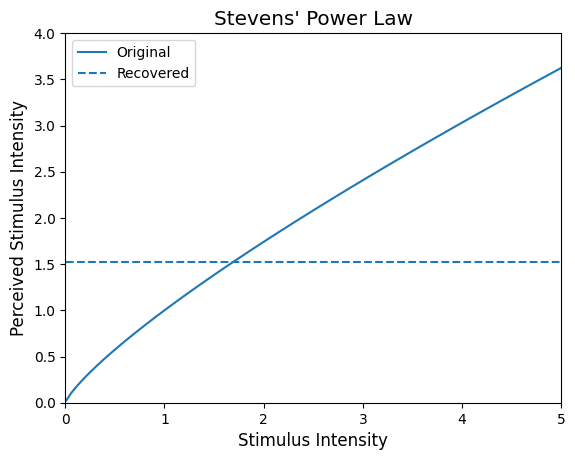

In [9]:
# run benchmark
benchmark(experiment_runner = stevens_power_law(), theorist = theorist)

#### EXPERIMENT CONDITIONS (X):
            S1        S2
0     0.010000  0.010000
1     0.010000  0.060404
2     0.010000  0.110808
3     0.010000  0.161212
4     0.010000  0.211616
...        ...       ...
5045  4.899192  4.949596
5046  4.899192  5.000000
5047  4.949596  4.949596
5048  4.949596  5.000000
5049  5.000000  5.000000

[5050 rows x 2 columns]
#### EXPERIMENT OBSERVATIONS (Y):
      difference_detected
0                0.011362
1                1.803396
2                2.401170
3                2.783681
4                3.055570
...                   ...
5045             0.019554
5046             0.027396
5047            -0.008938
5048             0.003961
5049            -0.008881

[5050 rows x 1 columns]
## equation:  ['ln', 'S2']
##--------------------- iteration:  0
## len_eqn:  2
## eqn_old:  ['ln', 'S2']
## method:  node_replacement
## equation:  ['ln', 'S2']
## fit_old:  -1.4064842288429578
## fit_new:  -1.4064842288429578
## acceptance_prob:  0.5
## accepted
##-----

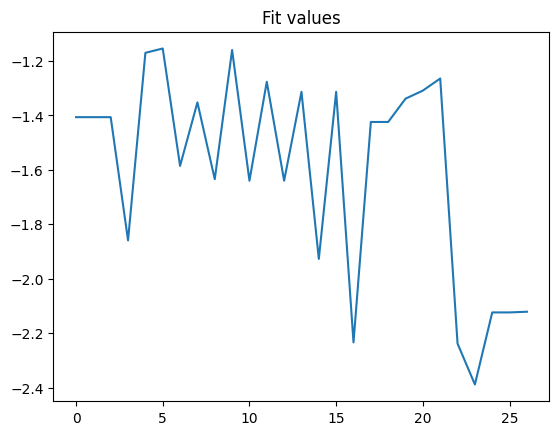

#### PREDICTIONS:
[[2.10527537]
 [2.17322549]
 [1.93858847]
 ...
 [1.68014563]
 [2.38729813]
 [0.92219317]]
#### IDENTIFIED EQUATION:
((((ln(((ln((exp((0.8653504906545108 * S2))))) + S2))) / 0.9353196604366136) / S2) * S2)
#### VALIDATION SET MSE:
difference_detected    2.07624
dtype: float64


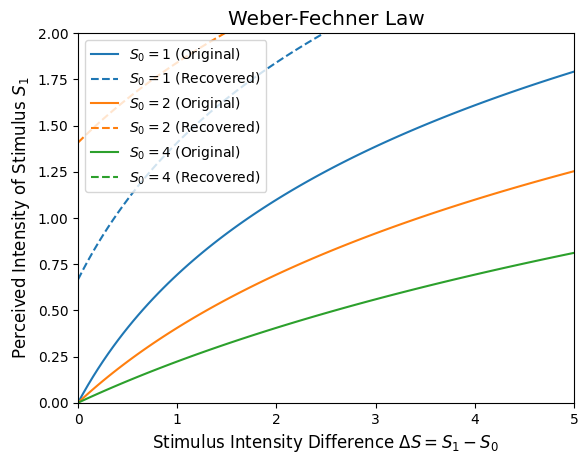

In [10]:
# run benchmark
benchmark(experiment_runner = weber_fechner_law(), theorist = theorist)